In [73]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 
import time as t

# 🎲 Generate a Random Matrix:

In [43]:
import numpy as np


def generate_matrix(rows: int, columns: int, distributions: list[tuple[float, float]] = None, global_mean_std: tuple[float, float] = None) -> np.ndarray:
    """
    Generates a matrix where each column follows a specified normal distribution.
    
    Parameters:
    rows (int): Number of rows in the matrix.
    columns (int): Number of columns in the matrix.
    distributions (list of tuples, optional): A list where each tuple contains (mean, std) for the normal distribution
                                              of the corresponding column. The length must match the number of columns.
    global_mean_std (tuple, optional): A single (mean, std) pair to be applied to all columns if distributions are not provided.
    
    Returns:
    np.ndarray: Generated matrix with specified distributions.
    """
    if global_mean_std:
        mean, std = global_mean_std
        return np.random.normal(loc=mean, scale=std, size=(rows, columns))

    if distributions is None or len(distributions) != columns:
        raise ValueError(
            "Number of distributions must match the number of columns or provide a global mean and std.")

    matrix = np.zeros((rows, columns))
    for col in range(columns):
        mean, std = distributions[col]
        matrix[:, col] = np.random.normal(loc=mean, scale=std, size=rows)

    return matrix


### 📌 Example:

In [44]:
# Example usage:
rows = 5
columns = 3
# Mean and std deviation for each column
specific_distributions = [(0, 1), (5, 2), (-3, 0.5)]
global_distribution = (2, 1)  # Apply same mean and std to all columns

# Using specific distributions

matrix1 = generate_matrix(rows, columns, distributions=specific_distributions)
print("Matrix with specific distributions:\n", matrix1)

# Using global mean and std
matrix2 = generate_matrix(rows, columns, global_mean_std=global_distribution)
print("\nMatrix with global distribution:\n", matrix2)

Matrix with specific distributions:
 [[-0.04295096  4.71794785 -3.20591596]
 [ 0.80599932  8.00786241 -3.04540853]
 [-0.80565946  4.23072605 -3.70207272]
 [ 0.08005673  6.09758819 -3.6335483 ]
 [-1.39413289  5.27689687 -2.73839811]]

Matrix with global distribution:
 [[2.44980701 1.65998536 1.3920163 ]
 [2.84678911 2.11731542 2.07611989]
 [2.16588011 0.30191098 3.59718249]
 [3.34152357 2.20329662 3.83292286]
 [2.49747606 1.11227864 2.51379079]]


# 🎲 Function to Generate Multiple Matrices with Customizable Storage and Distribution Options


In [ ]:
from typing import List, Tuple, Dict, Union


def generate_matrices(num_matrices: int, rows: int, columns: int, storage_type: str = "array",
                      distributions: List[Tuple[float, float]] = None, global_mean_std: Tuple[float, float] = None) -> Union[List[np.ndarray], Dict[str, np.ndarray]]:
    """
    Generates multiple matrices and stores them in either a list (array) or a dictionary.
    
    Parameters:
    num_matrices (int): Number of matrices to generate.
    rows (int): Number of rows per matrix.
    columns (int): Number of columns per matrix.
    storage_type (str): Either "array" for a list or "dict" for a dictionary.
    distributions (List[Tuple[float, float]], optional): List of (mean, std) pairs for each column.
    global_mean_std (Tuple[float, float], optional): Single (mean, std) pair for all columns.
    
    Returns:
    Union[List[np.ndarray], Dict[str, np.ndarray]]: Generated matrices stored as a list or dictionary.
    """
    if storage_type not in ["array", "dict"]:
        raise ValueError("storage_type must be either 'array' or 'dict'")

    if storage_type == "array":
        return [generate_matrix(rows, columns, distributions, global_mean_std) for _ in range(num_matrices)]
    else:
        return {f"matrix_{i}": generate_matrix(rows, columns, distributions, global_mean_std) for i in range(num_matrices)}
    
    

### 📌 Example:

In [41]:
# Example usage:
num_matrices = 3
rows = 5
columns = 3
# Mean and std deviation for each column
specific_distributions = [(0, 1), (5, 2), (-3, 0.5)]
global_distribution = (2, 1)  # Apply same mean and std to all columns

# Generate list of matrices
matrix_list = generate_matrices(
    num_matrices, rows, columns, "array", specific_distributions)
print("List of Matrices:", matrix_list)

# Generate dictionary of matrices
matrix_dict = generate_matrices(
    num_matrices, rows, columns, "dict", global_mean_std=global_distribution)
print("\nDictionary of Matrices:", matrix_dict)

List of Matrices: [array([[ 1.73639005,  5.81753389, -2.66718246],
       [ 0.23368058,  4.2206833 , -2.6044309 ],
       [-0.12805468,  5.72146635, -3.57163268],
       [-1.46499689,  7.11122439, -1.4110919 ],
       [-0.88407255,  4.53772526, -2.43613933]]), array([[ 0.79162266,  5.34095056, -2.34453403],
       [ 1.49936464,  3.2661061 , -2.61086626],
       [ 0.07828453,  2.02720679, -2.95319689],
       [-0.19149823,  6.66599246, -2.47659231],
       [ 0.29547663,  3.73385724, -3.0781182 ]]), array([[ 0.09832591,  5.78786237, -2.93297054],
       [ 1.38070749,  3.94213327, -3.20256761],
       [ 0.17358116,  4.20629697, -3.44200747],
       [-0.23944858,  5.98783271, -3.30399158],
       [ 0.81213519,  0.18196093, -3.2681037 ]])]

Dictionary of Matrices: {'matrix_0': array([[0.39926513, 2.67646228, 1.69873672],
       [2.3123738 , 0.23768279, 0.17071583],
       [1.38285312, 1.75136356, 1.68592414],
       [0.8302621 , 3.36414608, 2.74050599],
       [2.98896974, 0.15210337, 2.427

In [85]:
A = generate_matrix(10,10,global_mean_std=(3,0.9))
B = generate_matrix(10, 10, global_mean_std=(3, 0.9))
C = generate_matrix(10, 10, global_mean_std=(3, 0.9))
D = generate_matrix(10, 10, global_mean_std=(3, 0.9))

FACTORS = ["Water Usage",
           "Carbon Emissions",
           "Energy Consumption",
           "Material Waste",
           "Land Use",
           "Air Pollution",
           "Toxicity",
           "Resource depletion",
           "Eutrophication",
           "Acidification"]


# Robust testing

Big_A = generate_matrix(10000, 10000, global_mean_std=(3, 0.9))
Big_B = generate_matrix(10000, 10000, global_mean_std=(3, 0.9))

## 🧮 Discernibility Analysis:

In [69]:
def DA_prim(A,B):
    N= len(A)
    if A.shape != B.shape or len(A)==0:
        raise ValueError("A and B should have the same dimensions & Matrices shouldn't be empty.")
    result=np.zeros(N)

    for j in range(N):
         counter=0
         for i in range(N):
             if A[i,j]-B[i,j]<0:
                 counter+=1
         result[j]=counter/N

    return result
                 
      


In [82]:
def Discernibility_Analysis(mat1: np.ndarray, mat2: np.ndarray) -> np.ndarray:


    if mat1.shape[1] != mat2.shape[1]:
         raise ValueError("Both matrices must have the same number of columns")
    
    return np.mean(mat1-mat2<0, axis=0)

### ✅ Test

In [71]:
DA_prim(A, B)

array([0.3, 0.6, 0.6, 0.5, 0.9, 0.7, 0.5, 0.3, 0.5, 0.5])

In [83]:
Discernibility_Analysis(A,B)

array([0.4, 0.5, 0.4, 0.6, 0.6, 0.3, 0.3, 0.2, 0.8, 0.6])

In [81]:
start_time = t.time()
DA_prim(Big_A,Big_B)
end_time = t.time()

print(f"Execution time of DA_prim : {end_time - start_time} seconds\n")

start_time = t.time()
Discernibility_Analysis(Big_A,Big_B)
end_time = t.time()

print(
    f"Execution time of Discernibility_Analysis : {end_time - start_time} seconds\n")

Execution time of DA_prim : 61.25315570831299 seconds

Execution time of Discernibility_Analysis : 0.5373585224151611 seconds



# 📊 Vizualisation of the Discernability Analysis

### Heatmap Color Palettes 🎨

Seaborn provides a variety of color palettes for heatmaps. Here are some popular ones and their use cases:

| Palette Name | Description | Example Use Case | Emoji Representation |
|--------------|-------------|------------------|----------------------|
| `"YlGnBu"`   | Yellow-Green-Blue gradient 🌈 | Default for discernibility analysis | 🟨🟩🟦 |
| `"viridis"`  | Perceptually uniform gradient 🌟 | Scientific data visualization | 🟣🔵🟢 |
| `"coolwarm"` | Blue-Red gradient 🔵🔴 | Highlighting contrasts in data | 🔵🔴 |
| `"RdYlBu"`   | Red-Yellow-Blue gradient 🌈 | Emphasizing diverging data | 🔴🟨🔵 |
| `"Greens"`   | Green gradient 🌿 | Environmental or sustainability data | 🟢 |
| `"Blues"`    | Blue gradient 💙 | Water-related or calm data | 🔵 |
| `"Reds"`     | Red gradient 🔥 | Highlighting risks or warnings | 🔴 |

Choose a palette that aligns with your data's context and the message you want to convey! 🎨✨

In [89]:


def plot_discernibility_heatmap(matrices: List[np.ndarray], labels: List[str], factor_names: List[str], heatmap_theme: str = "YlGnBu"):
    """
    Plots a heatmap of discernibility analysis for multiple alternatives and factors.
    
    Parameters:
    matrices (List[np.ndarray]): List of matrices for each alternative (shape: n_samples x n_factors).
    labels (List[str]): List of labels for each alternative.
    factor_names (List[str]): List of names for each factor (e.g., water, carbon, material).
    heatmap_theme (str): Color palette for the heatmap. Default is "YlGnBu".
    """
    n_alternatives = len(matrices)
    n_factors = matrices[0].shape[1]

    # Initialize a matrix to store discernibility probabilities
    heatmap_data = np.zeros(
        (n_alternatives * (n_alternatives - 1) // 2, n_factors))

    # Fill the heatmap data
    row_labels = []
    idx = 0

    for i in range(n_alternatives):
        for j in range(i + 1, n_alternatives):
            row_labels.append(f"{labels[i]} > {labels[j]}")
            heatmap_data[idx, :] = Discernibility_Analysis(
                matrices[i], matrices[j])
            idx += 1

    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        heatmap_data,
        annot=True,
        fmt=".2f",
        cmap=heatmap_theme,  # Use the specified color palette
        xticklabels=factor_names,
        yticklabels=row_labels
    )
    plt.xlabel("Factors")
    plt.ylabel("Alternative Comparisons")
    plt.title("Discernibility Analysis Heatmap")
    plt.show()

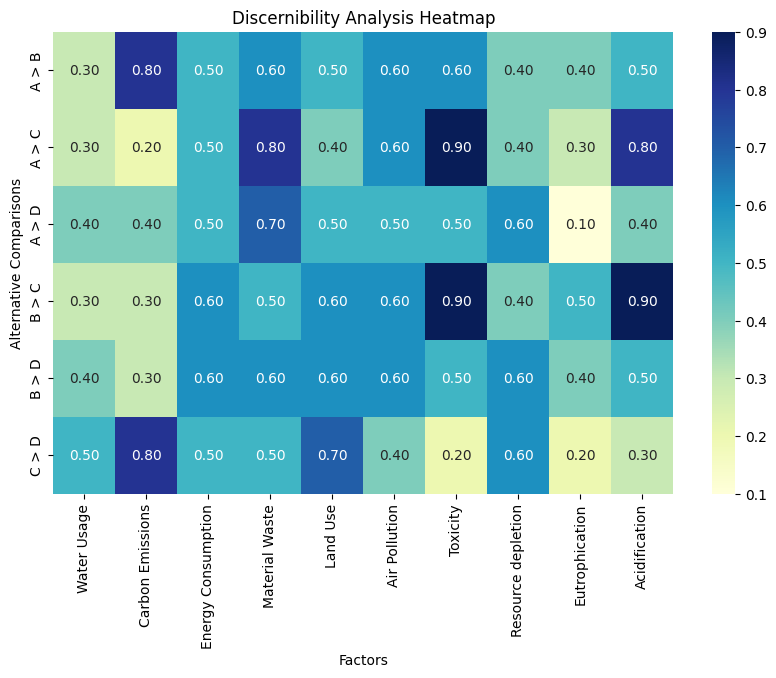

In [90]:
plot_discernibility_heatmap(matrices=[A,B,C,D],
                            labels=["A","B","C","D"],
                            factor_names=FACTORS)

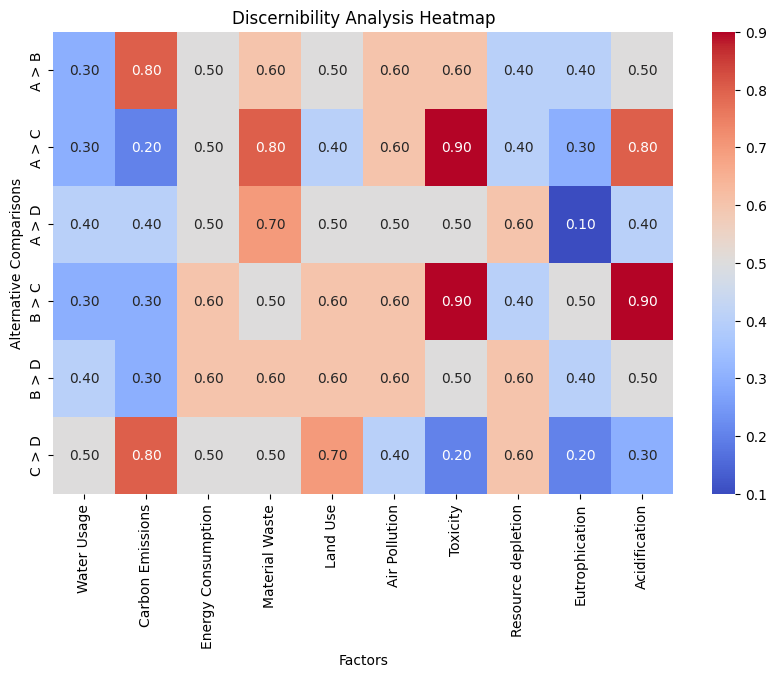

In [91]:
plot_discernibility_heatmap(matrices=[A, B, C, D],
                            labels=["A", "B", "C", "D"],
                            factor_names=FACTORS,heatmap_theme="coolwarm")

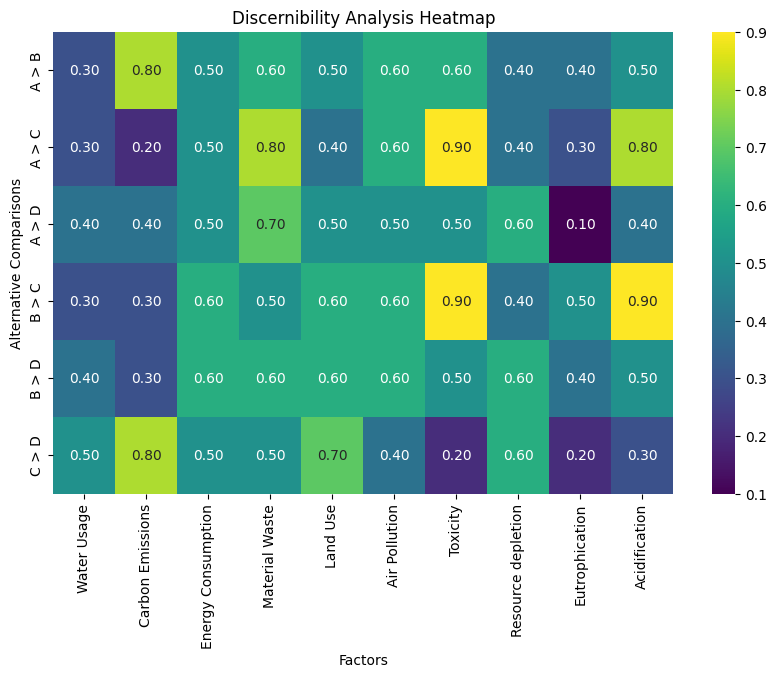

In [92]:
plot_discernibility_heatmap(matrices=[A, B, C, D],
                            labels=["A", "B", "C", "D"],
                            factor_names=FACTORS,heatmap_theme="viridis")

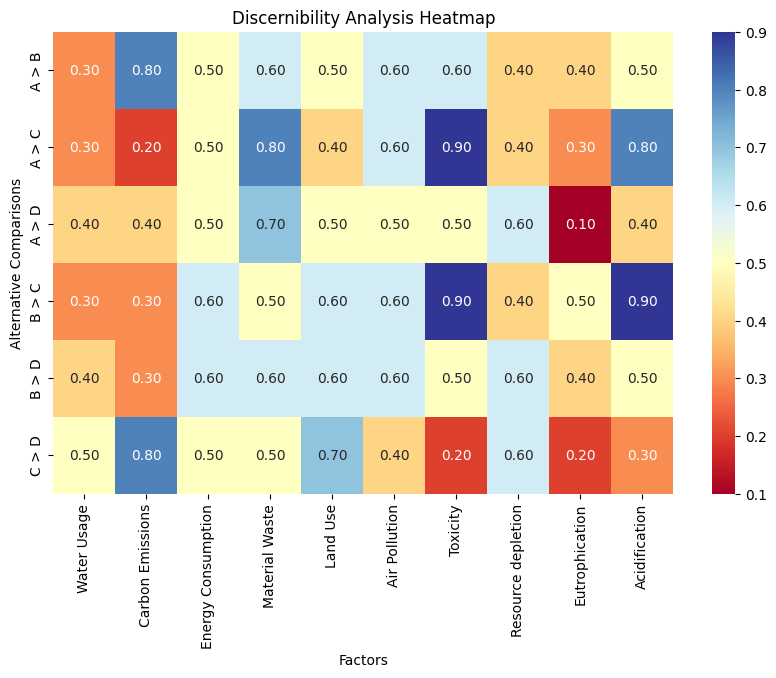

In [93]:
plot_discernibility_heatmap(matrices=[A, B, C, D],
                            labels=["A", "B", "C", "D"],
                            factor_names=FACTORS, heatmap_theme="RdYlBu")

In [ ]:
plot_discernibility_heatmap(matrices=[A, B, C, D],
                            labels=["A", "B", "C", "D"],
                            factor_names=FACTORS, heatmap_theme="Green")